# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** \ Zoe Tseng
**Email:** zpt2002@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

A strategy for dataset 1 (44 phones from 100 people) would be to split the training and test data into 70%:30%. The model should split data based on speakers. A strategy for Killian's data includes keeping the original generalization val/test sets unchanged — they must not contain Kilian. Split Kilian’s 10,000 samples into a Kilian-train and a Kilian-test (for validating personalization). Train a general model on many speakers (no Kilian), then specialize via controlled fine-tuning or an adapter that uses Kilian’s data.


### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


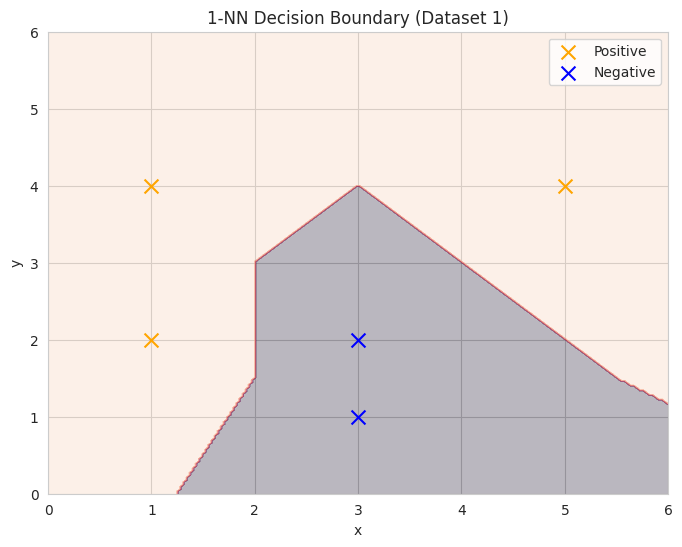

Prediction BEFORE scaling: 1
Prediction AFTER scaling: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

pos = np.array([[1,2], [1,4], [5,4]])
neg = np.array([[3,1], [3,2]])

X = np.vstack([pos, neg])
y = np.array([1]*len(pos) + [0]*len(neg))

# 1-NN classifier
def knn_predict(point, X, y):
    dists = np.linalg.norm(X - point, axis=1)
    idx = np.argmin(dists)
    return y[idx]

# grid for decision boundary
xx, yy = np.meshgrid(
    np.linspace(0, 6, 200),
    np.linspace(0, 6, 200)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

preds = np.array([knn_predict(p, X, y) for p in grid_points])
preds = preds.reshape(xx.shape)

# plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, preds, alpha=0.3)
plt.scatter(pos[:,0], pos[:,1], c="orange", marker="x", s=100, label="Positive")
plt.scatter(neg[:,0], neg[:,1], c="blue", marker="x", s=100, label="Negative")
plt.title("1-NN Decision Boundary (Dataset 1)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# DATASET 2 — Feature Scaling + Classification
pos2 = np.array([[100,2], [100,4], [500,4]])
neg2 = np.array([[300,1], [300,2]])

X2 = np.vstack([pos2, neg2])
y2 = np.array([1]*len(pos2) + [0]*len(neg2))

test_point = np.array([[500,1]])

# classification BEFORE scaling
pred_before = knn_predict(test_point[0], X2, y2)

# scale to [0,1]
scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2)
test_scaled = scaler.transform(test_point)

# classification AFTER scaling
pred_after = knn_predict(test_scaled[0], X2_scaled, y2)

print("Prediction BEFORE scaling:", pred_before)
print("Prediction AFTER scaling:", pred_after)

#3) To handle missing features, look for the nearest neighbors and find their median.
#4) K-NN still works well for images because it can find patterns based on shape, texture, and color.


### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [ ]:
#1) Yes because it compares the errors for training and test data. If one is greater than the other, it indicates overfitting or underfitting.
#2) Training error is always zero.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [ ]:
X = np.array([
    [10, -2],   # Positive
    [12,  2]    # Negative
])
y = np.array([+1, -1])

# Initialize
w = np.zeros(2, dtype=float)
eta = 1

weights = [w.copy()]
updated = True

iteration = 0

while True:
    updated = False

    for x_i, y_i in zip(X, y):
        pred = np.sign(np.dot(w, x_i))
        if pred == 0:
            pred = 0

        if pred != y_i:
            w = w + eta * y_i * x_i
            weights.append(w.copy())
            updated = True
            iteration += 1

    if not updated:
        break

print("Total updates:", iteration)
print("Sequence of weights:")
for i, wi in enumerate(weights):
    print(f"w{i} = {wi}")

Total updates: 9
Sequence of weights:
w0 = [0. 0.]
w1 = [10. -2.]
w2 = [-2. -4.]
w3 = [ 8. -6.]
w4 = [-4. -8.]
w5 = [  6. -10.]
w6 = [ -6. -12.]
w7 = [  4. -14.]
w8 = [ -8. -16.]
w9 = [  2. -18.]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [ ]:
X = np.array([
    [0, 0, 0, 0, 4],
    [0, 0, 6, 5, 0],
    [3, 0, 0, 0, 0],
    [0, 9, 3, 6, 0],
    [0, 1, 0, 2, 5]
])
y = np.array([+1, +1, -1, -1, -1])
counts = np.array([2, 1, 1, 1, 1])

w = np.zeros(5)   # initial weight
lr = 1            # learning rate

# Expand X and y according to count (literal repetition)
for xi, yi, ct in zip(X, y, counts):
    for _ in range(ct):
        if yi * np.dot(w, xi) <= 0:
            w = w + lr * yi * xi

print("Final weight vector:", w)

Final weight vector: [ -3. -10.   3.  -3.  -1.]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

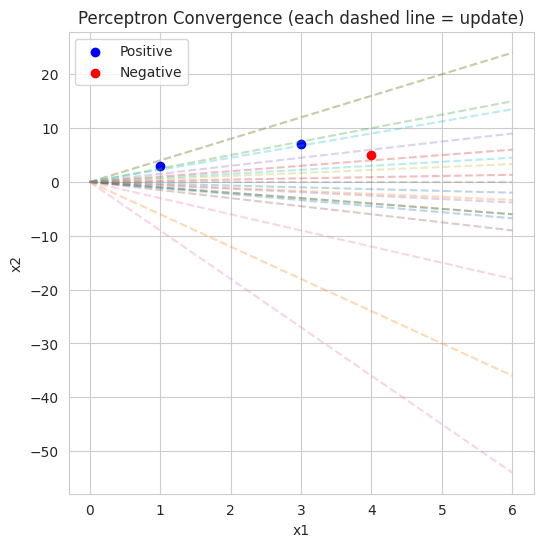


Each dashed line shows how the decision boundary shifts after an update.
Eventually, the updates stop (convergence) once all points are correctly classified.



In [ ]:
# Small 2D dataset
X = np.array([[1,3],[2,4],[3,7],[4,5]])
y = np.array([1,-3,1,-1])
w = np.zeros(2)
lr = 1
weights = [w.copy()]

for epoch in range(10):
    for xi, yi in zip(X, y):
        if yi * np.dot(w, xi) <= 0:
            w = w + lr * yi * xi
            weights.append(w.copy())

# Plot data
plt.figure(figsize=(6,6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Positive')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red', label='Negative')

# Plot decision boundaries for each update
x_vals = np.linspace(0,6,100)
for i, wv in enumerate(weights):
    if wv[1] != 0:
        y_vals = -(wv[0]/wv[1])*x_vals
        plt.plot(x_vals, y_vals, '--', alpha=0.3)

plt.title("Perceptron Convergence (each dashed line = update)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend()
plt.show()

print("""
Each dashed line shows how the decision boundary shifts after an update.
Eventually, the updates stop (convergence) once all points are correctly classified.
""")